In [1]:
import tensorflow as tf


x = tf.constant([35, 40, 45], name='x')
y = tf.Variable(x + 5, name='y')


model = tf.global_variables_initializer()

with tf.Session() as session:
	session.run(model)
	print(session.run(y))

[40 45 50]


In [2]:
import numpy as np

In [3]:
data = np.random.randint(1000, size=10000)
data

array([  8, 482, 436, ..., 108, 841,  25])

In [4]:
x = tf.constant(data, name='x')
y = tf.Variable((5*(x**2))-3*x + 15, name='y')
model = tf.global_variables_initializer()


with tf.Session() as session:
    session.run(model)
    print(session.run(x))
    x=x+1
    print(session.run(y))
    print(session.run(x))
 

[  8 482 436 ..., 108 841  25]
[    311 1160189  949187 ...,   58011 3533897    3065]
[  9 483 437 ..., 109 842  26]


In [5]:
data1 = np.random.randint(10, size =10)
data1

array([0, 3, 2, 7, 1, 9, 4, 5, 6, 5])

In [6]:
temp = data1**2

In [7]:
temp

array([ 0,  9,  4, 49,  1, 81, 16, 25, 36, 25])

In [8]:
x = tf.Variable(0, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(5):
        x = x + 1
        print(session.run(x))

1
2
3
4
5


In [9]:
import tensorflow as tf

x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./.", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))


Tensor("x_3:0", shape=(), dtype=int32)
40


In [10]:
#IMage
import matplotlib.image as mpimg
image = mpimg.imread("bird.jpg")
print image.shape

(1440, 1920, 3)


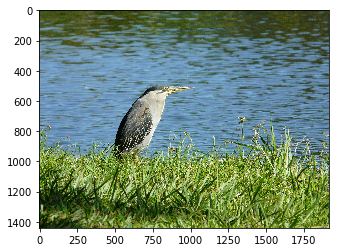

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [12]:
x = tf.Variable(image, name='x')

In [13]:
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])#This line uses TensorFlow’s transpose method, 
    #swapping the axes 0 and 1 around using the perm parameter (axis 2 stays where it is).
    session.run(model)
    result = session.run(x)

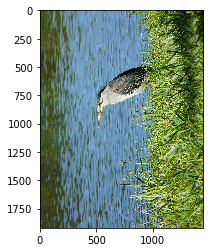

In [14]:
plt.imshow(result)
plt.show()

(1440, 1920, 3)


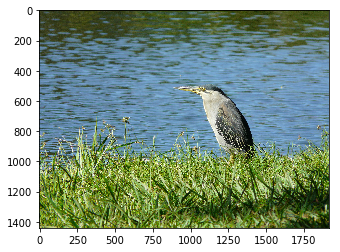

In [15]:
height, width, depth = image.shape
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

(840, 1920, 3)


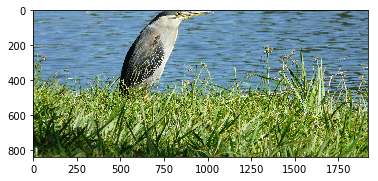

In [16]:
raw_image_data = mpimg.imread("bird.jpg")
image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [500, 0, 0], [840, -1, -1]) # tensor Slice of data

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

In [17]:
import resource
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)) #find out how much memory our Python session

339636 Kb


In [18]:
#TensorBoard graph
import tensorflow as tf

a = tf.add(1, 2, name="Add_these_numbers") # Add name to these Graph
b = tf.multiply(a, 3)
c = tf.add(4, 5,)
d = tf.multiply(c, 6,)
e = tf.multiply(4, 5,)
f = tf.div(c, 6,)
g = tf.add(b, d)
h = tf.multiply(g, f)

with tf.Session() as sess:
	writer = tf.summary.FileWriter("output", sess.graph) # to see graph run
    #tensorboard --logdir=/root/vyas/output
	print(sess.run(h))
	writer.close()

63


In [19]:
#learn File Reading
import tensorflow as tf
filename ="olympics2016.csv"
features = tf.placeholder(tf.int32, shape=[3], name='features')
country = tf.placeholder(tf.string, name='country')
total = tf.reduce_sum(features, name='total')
#total = tf.add(features, 1)
#Toatl input value and [country, features, total] data to be print out
printerop = tf.Print(total, [country, features, total], name='printer')
#print printerop


In [20]:
with tf.Session() as sess:
    sess.run( tf.global_variables_initializer())
    with open(filename) as inf:
        next(inf)
        for line in inf:
            country_name, code, gold, silver, bronze, total = line.strip().split(",")
            gold = int(gold)
            silver = int(silver)
            bronze = int(bronze)
            #total = sess.run(printerop, feed_dict={features: [gold, silver, bronze], country:country_name})
            #print total
            total = sess.run(printerop, feed_dict={features: [gold, silver, bronze], country:country_name})
            print(country_name, total)
                         
                        

('"United States"', 121)
('"Great Britain"', 67)
('"China"', 70)
('"Russia"', 56)
('"Germany"', 42)
('"Japan"', 41)
('"France"', 42)
('"South Korea"', 21)
('"Italy"', 28)
('"Australia"', 29)
('"Netherlands"', 19)
('"Hungary"', 15)
('"Brazil"', 19)
('"Spain"', 17)
('"Kenya"', 13)
('"Jamaica"', 11)
('"Croatia"', 10)
('"Cuba"', 11)
('"New Zealand"', 18)
('"Canada"', 22)
('"Uzbekistan"', 13)
('"Kazakhstan"', 17)
('"Colombia"', 8)
('"Switzerland"', 7)
('"Iran"', 8)
('"Greece"', 6)
('"Argentina"', 4)
('"Denmark"', 15)
('"Sweden"', 11)
('"South Africa"', 10)
('"Ukraine"', 11)
('"Serbia"', 8)
('"Poland"', 11)
('"North Korea"', 7)
('"Belgium"', 6)
('"Thailand"', 6)
('"Slovakia"', 4)
('"Georgia"', 7)
('"Azerbaijan"', 18)
('"Belarus"', 9)
('"Turkey"', 8)
('"Armenia"', 4)
('"Czech Republic"', 10)
('"Ethiopia"', 8)
('"Slovenia"', 4)
('"Indonesia"', 3)
('"Romania"', 5)
('"Bahrain"', 2)
('"Vietnam"', 2)
('"Chinese Taipei"', 3)
('"Bahamas"', 2)
('"Ivory Coast"', 2)
('"Independent Olympic Athletes"', 2

In [23]:
#file read in tensorflow
filenames = ["olympics2016.csv"]
def create_file_reader_ops(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    _, csv_row = reader.read(filename_queue)
    record_defaults = [[""], [""], [0], [0], [0], [0]]
    country, code, gold, silver, bronze, total = tf.decode_csv(csv_row, record_defaults=record_defaults)
    features = tf.stack([gold, silver, bronze], name='pack')
    return features, country

filename_queue = tf.train.string_input_producer(filenames, num_epochs=1, shuffle=False)
example, country = create_file_reader_ops(filename_queue)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    while True:
        try:
            example_data, country_name = sess.run([example, country])
            print(example_data, country_name)
        except tf.errors.OutOfRangeError:
            break

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.FailedPreconditionError'>, Attempting to use uninitialized value input_producer/limit_epochs/epochs
	 [[Node: input_producer/limit_epochs/CountUpTo = CountUpTo[T=DT_INT64, _class=["loc:@input_producer/limit_epochs/epochs"], limit=1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer/limit_epochs/epochs)]]
